# 1. Load data for practice

In [1]:
import pandas as pd

df = pd.read_csv('./air_quality_2001_2021.csv')
df.head()

,dt,so2,no2,co,o3,pm10,pm2.5
0,2001-01-31,0.004952,0.039303,0.864058,0.005111,103.361923,65.291538
1,2001-02-28,0.006069,0.048472,0.888093,0.006464,105.924815,66.457037
2,2001-03-31,0.003205,0.038955,0.684410,0.010901,133.864516,70.439355
3,2001-04-30,0.005903,0.034180,0.669548,0.009973,112.954444,49.378519
4,2001-05-31,0.004970,0.034594,0.488658,0.016590,80.453548,45.598710


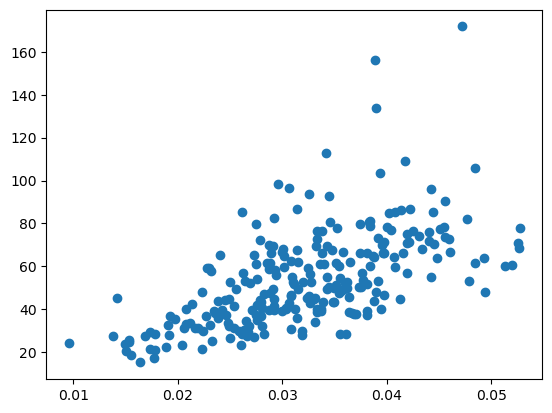

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['no2'], df['pm10'])

# 2. Simple Linear Regression Model

In [3]:
from scipy.stats import linregress

slope, intercept, r, p, se = linregress(df['no2'], df['pm10'])
print(slope, intercept, r, p)

1598.033679197096 2.654819259624425 0.6022658068309485 5.712112106706283e-26


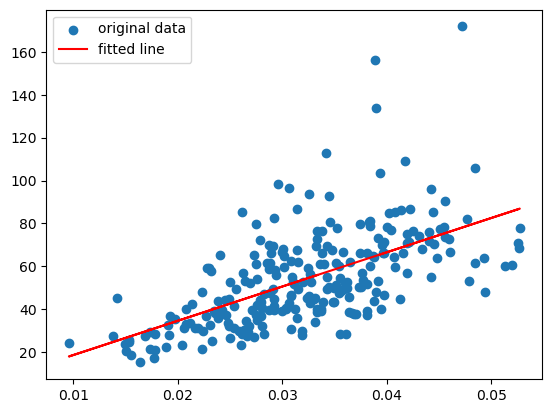

In [4]:
plt.scatter(df['no2'], df['pm10'], label='original data')
plt.plot(df['no2'], intercept+slope*df['no2'], 'red', label='fitted line')
plt.legend()
plt.show()

# 3. Calculate R2

In [5]:
from sklearn.metrics import r2_score

res = r2_score(df['pm10'].values, intercept+slope*df['no2'].values)
res

0.3627241020777334

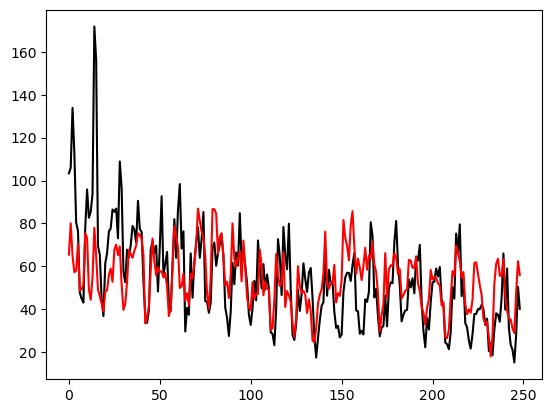

In [6]:
plt.plot(df['pm10'], color='black')
plt.plot(intercept+slope*df['no2'], color='red')
plt.show()

# 4. More Details

In [7]:
import statsmodels.api as sm

intercept = sm.add_constant(df['no2'])
model = sm.OLS(df['pm10'], intercept)
result = model.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   pm10   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     140.6
Date:                Tue, 02 Sep 2025   Prob (F-statistic):           5.71e-26
Time:                        14:13:36   Log-Likelihood:                -1072.2
No. Observations:                 249   AIC:                             2148.
Df Residuals:                     247   BIC:                             2156.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6548      4.493      0.591      0.555      -6.194      11.504
no2         1598.0337    134.776     11.857      0.000    1332.577    1863.491
==============================================================================
Omnibus:                      103.486   Durbin-Watson:                   0.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.980
Skew:                           1.685   Prob(JB):                     3.51e-95
Kurtosis:                       8.529   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""